In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import numpy as np


In [2]:
mnist = keras.datasets.mnist
(train_features,train_labels),(test_features,test_labels)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_features.shape

(60000, 28, 28)

In [4]:
test_features.shape

(10000, 28, 28)

In [5]:
idx=100
img=train_features[idx]
print(train_labels[idx])

5


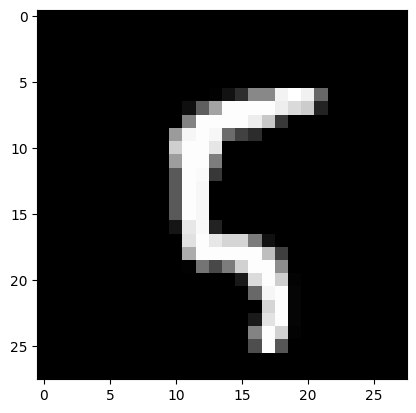

In [6]:
plt.gray()
plt.imshow(img)

In [7]:
np.min(img),np.max(img)

(np.uint8(0), np.uint8(255))

In [8]:
train_features=train_features/255.0
test_features=test_features/255.0

In [9]:
model=keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=10,activation=keras.activations.softmax))


In [10]:
model.compile(optimizer='adam',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['Accuracy'])

In [11]:
hist=model.fit(train_features,train_labels,epochs=40,batch_size=256,validation_data=(test_features,test_labels))

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - Accuracy: 0.7984 - loss: 0.7357 - val_Accuracy: 0.9501 - val_loss: 0.1750
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.9542 - loss: 0.1573 - val_Accuracy: 0.9633 - val_loss: 0.1183
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.9678 - loss: 0.1068 - val_Accuracy: 0.9671 - val_loss: 0.1033
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Accuracy: 0.9768 - loss: 0.0813 - val_Accuracy: 0.9729 - val_loss: 0.0888
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Accuracy: 0.9815 - loss: 0.0614 - val_Accuracy: 0.9755 - val_loss: 0.0803
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Accuracy: 0.9849 - loss: 0.0493 - val_Accuracy: 0.9765 - val_loss: 0.0760
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.9882 - loss: 0.0401 - val_Accuracy: 0.9777 - val_loss: 0.0706
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.9898 - loss: 0.0338 - val_Accuracy: 0

In [12]:
pred=model.predict(test_features)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


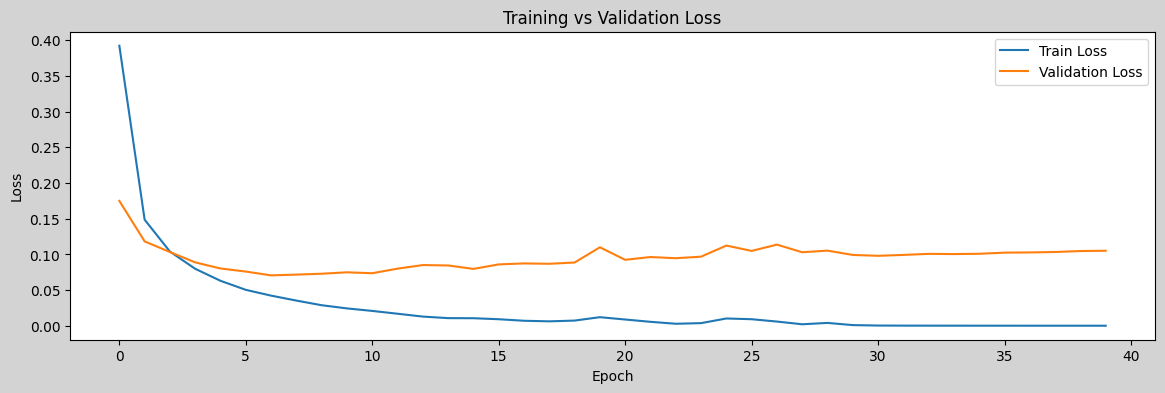

In [19]:
plt.figure(figsize=(14,4), facecolor='lightgray')
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


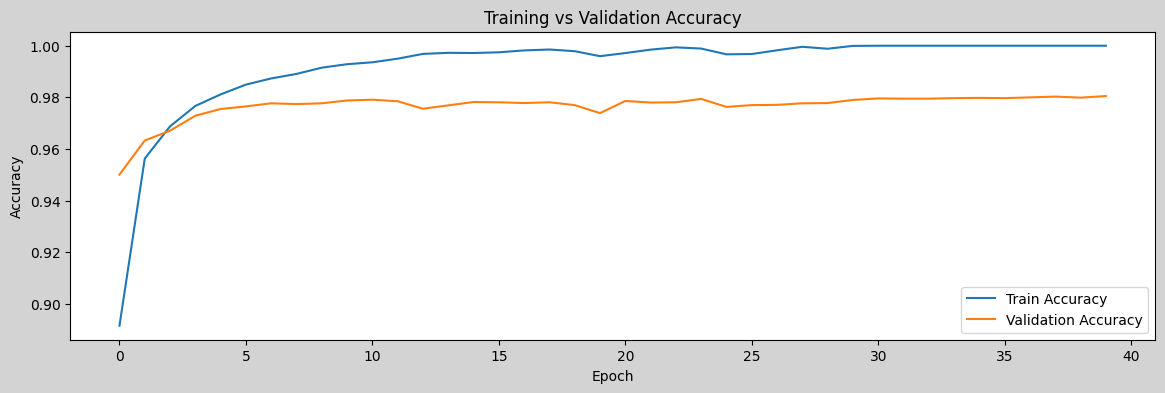

In [20]:
plt.figure(figsize=(14,4), facecolor='lightgray')
plt.plot(hist.history['Accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_Accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()


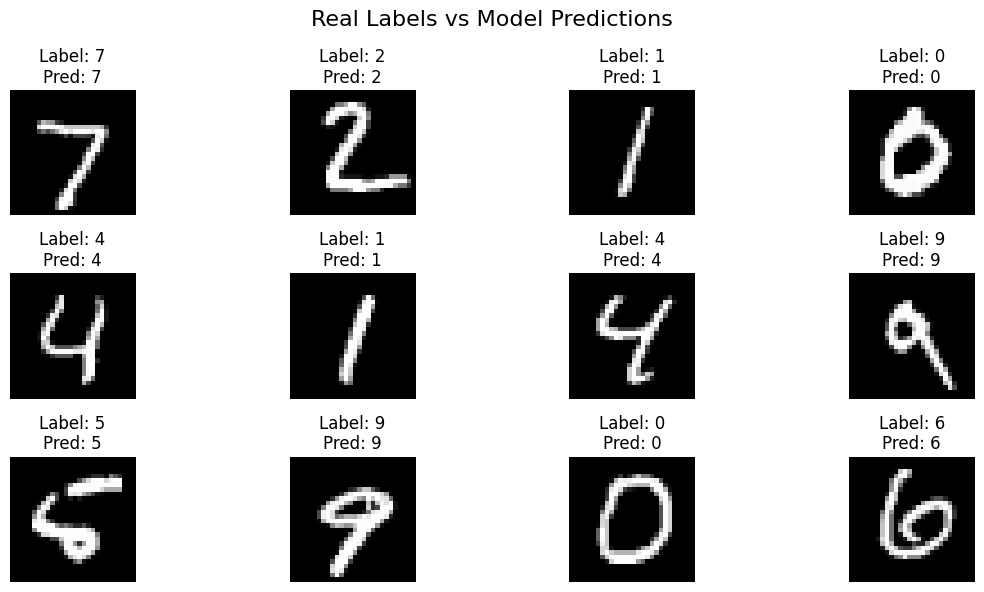

In [22]:

plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(test_features[i], cmap='gray')
    plt.title(f"Label: {test_labels[i]}\nPred: {np.argmax(pred[i])}")
    plt.axis('off')

plt.suptitle("Real Labels vs Model Predictions", fontsize=16)
plt.tight_layout()
plt.show()


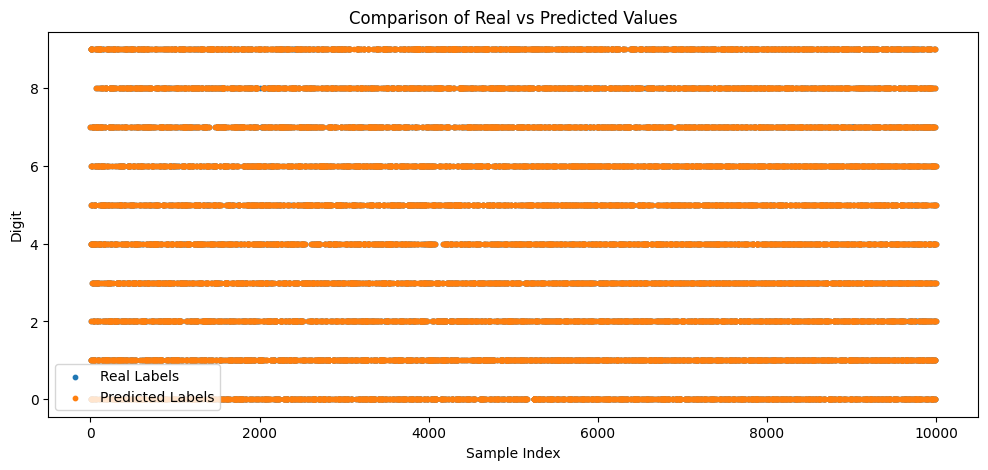

In [23]:
pred_classes = np.argmax(pred, axis=1)
plt.figure(figsize=(12,5))
plt.scatter(range(len(test_labels)), test_labels, label="Real Labels", s=10)
plt.scatter(range(len(pred_classes)), pred_classes, label="Predicted Labels", s=10)
plt.xlabel("Sample Index")
plt.ylabel("Digit")
plt.title("Comparison of Real vs Predicted Values")
plt.legend()
plt.show()


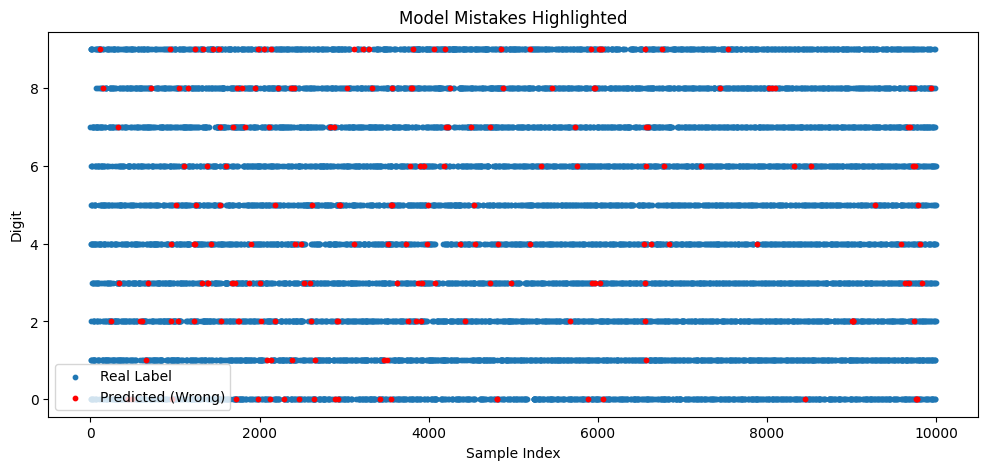

In [25]:
pred_classes = np.argmax(pred, axis=1)
errors = pred_classes != test_labels
plt.figure(figsize=(12,5))
plt.scatter(range(len(test_labels)), test_labels, label="Real Label", s=10)
plt.scatter(np.where(errors)[0], pred_classes[errors], label="Predicted (Wrong)", c="red", s=10)
plt.title("Model Mistakes Highlighted")
plt.xlabel("Sample Index")
plt.ylabel("Digit")
plt.legend()
plt.show()
